In [1]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from num2words import num2words
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
oversample = RandomOverSampler(sampling_strategy = 0.5,random_state=10) #need for neural network and random forest


In [95]:
data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')
data_by_HSA['health_service_area_number']
data_by_HSA['health_service_area']
data_by_HSA = data_by_HSA.dropna(subset=['admits_weekly', 'deaths_weekly', 'cases_weekly', 'icu_weekly', 'beds_weekly'])
data_by_HSA['HSA_ID'] = data_by_HSA['health_service_area_number'].astype(str) + '' + data_by_HSA['health_service_area'].apply(lambda x: x.split()[0])
data_by_HSA['beds_over_15_100k'] = (data_by_HSA['beds_weekly'] > 15)*1

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_1614/1612634015.py:1: DtypeWarning: Columns (41,43,44,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data_all_dates.csv')


In [96]:
# need to redo dates 

for i, week in enumerate(data_by_HSA['date'].unique()):
    data_by_HSA.loc[data_by_HSA['date'] == week, 'week'] = i

In [71]:
missing_data_train_HSA =[2.2388059701492535, 1.9900497512437811, 2.2388059701492535, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.7412935323383085, 1.7412935323383085, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357, 1.4925373134328357]
missing_data_test_HSA =[0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 0.9950248756218906, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.2437810945273633, 1.4925373134328357, 1.4925373134328357]

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_1614/2215657776.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)


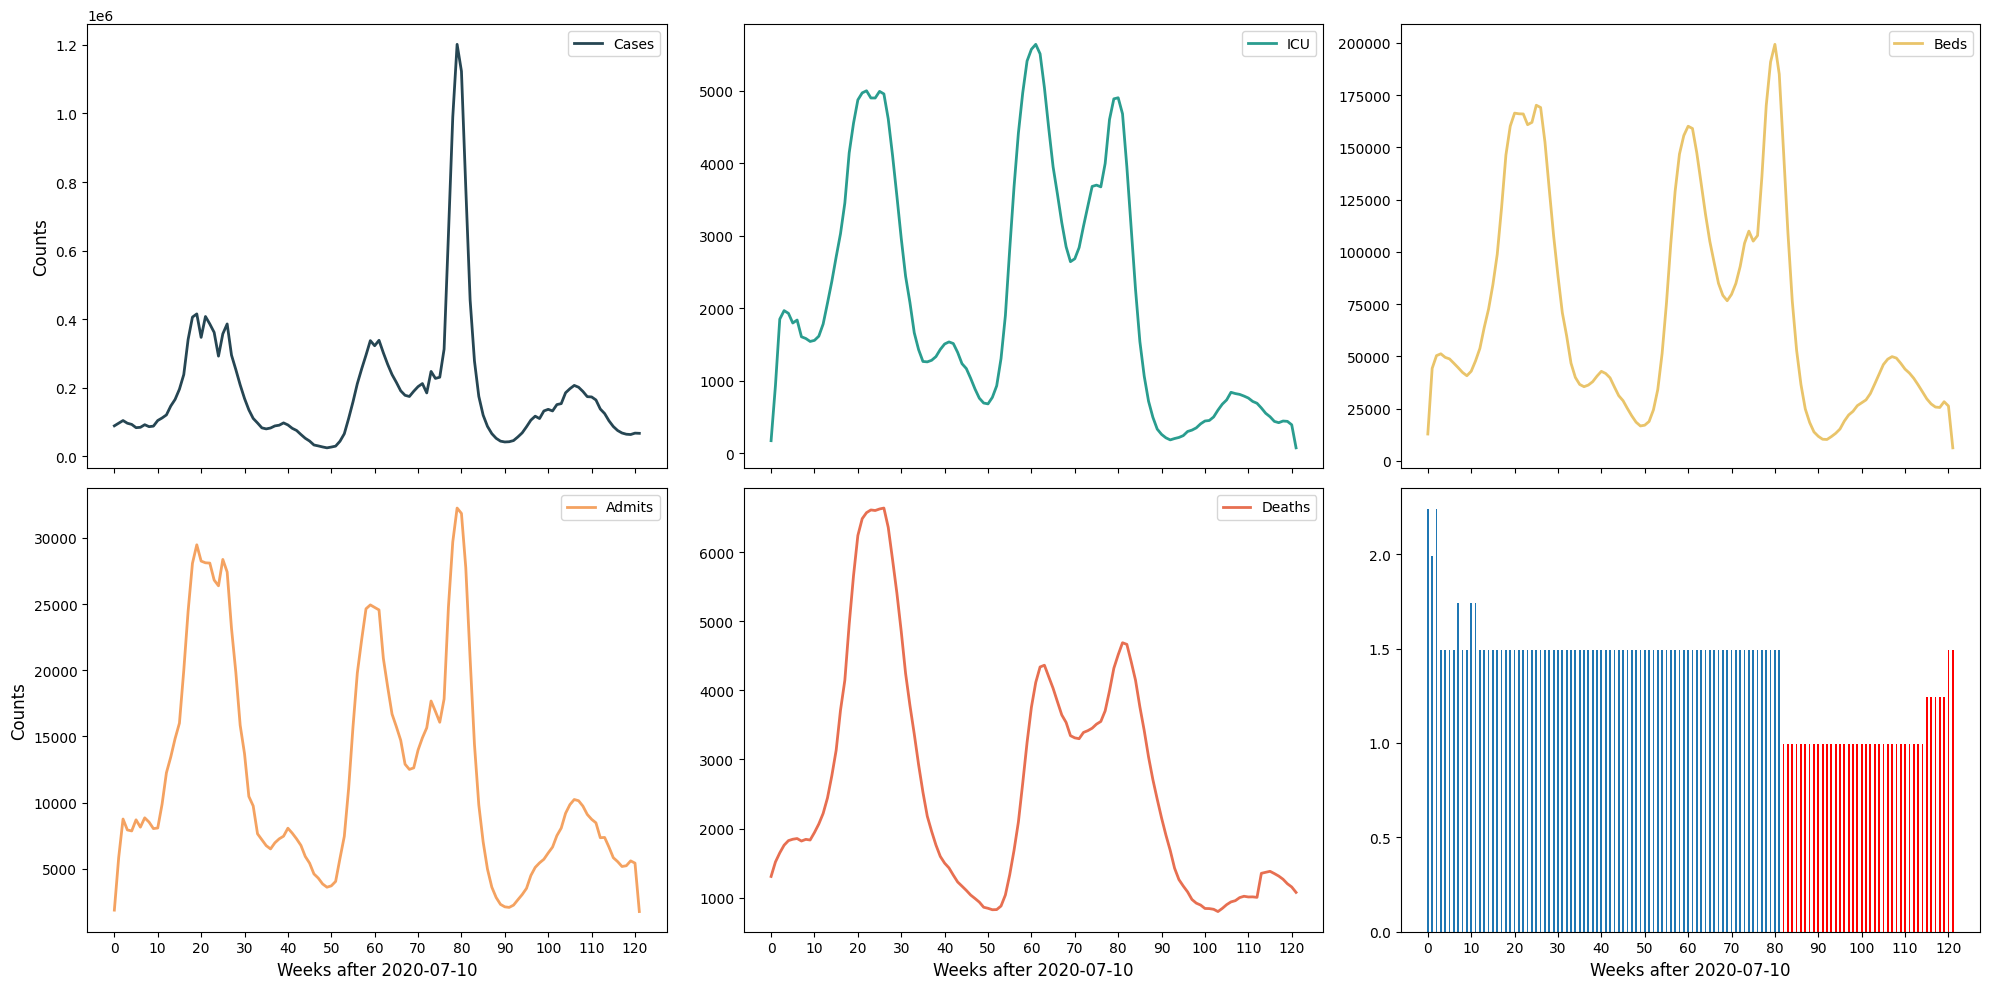

In [98]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].set_ylabel("Counts", fontsize = 12)
axs[3].set_ylabel("Counts", fontsize = 12)
axs[1].set_ylabel("", fontsize = 12)
axs[2].set_ylabel("", fontsize = 12)
axs[4].set_ylabel("", fontsize = 12)
axs[5].set_ylabel("", fontsize = 12)
axs[3].set_xlabel("Weeks after 2020-07-10", fontsize = 12)
axs[4].set_xlabel("Weeks after 2020-07-10", fontsize = 12)
axs[5].set_xlabel("Weeks after 2020-07-10", fontsize = 12)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('week')
i = 0
width = 0.4
x = np.arange(len(missing_data_train_HSA) + len(missing_data_test_HSA))

#x_ticks_labels = np.concatenate((np.arange(len(missing_data_train_HSA), step=10), np.arange(len(missing_data_test_HSA), step=10)), axis=0)

for column in columns_to_plot:
        if column == 'beds_over_15_100k':
                axs[i].bar(x[:len(missing_data_train_HSA)], missing_data_train_HSA, width, label='Train')
                axs[i].bar(x[len(missing_data_train_HSA):], missing_data_test_HSA, width, label='Test', color='red')
                axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 123, 10)), labels = np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                # Labels and title

        else:
                axs[i].plot(weekly_groups['week'].first(), weekly_groups[column].sum(), label = labels[i], color = colours[i], linewidth = 2)
                axs[i].legend()

                axs[i].set_xticklabels(labels =np.array(range(0, 123, 10)), rotation = 0, fontsize=10)
                axs[i].set_xticks(ticks =  np.array(range(0, 123, 10)), labels = np.array(range(0, 123, 10)), rotation = 0, fontsize=10)

                        

        i += 1

#plt.show()
fig.tight_layout()

plt.savefig('Graphs/Time_trends_July_2020_November_2022.png', dpi = 300)

In [37]:
np.arange(len(missing_data_train_HSA)//10, step=10)
np.arange(len(missing_data_train_HSA), step=10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

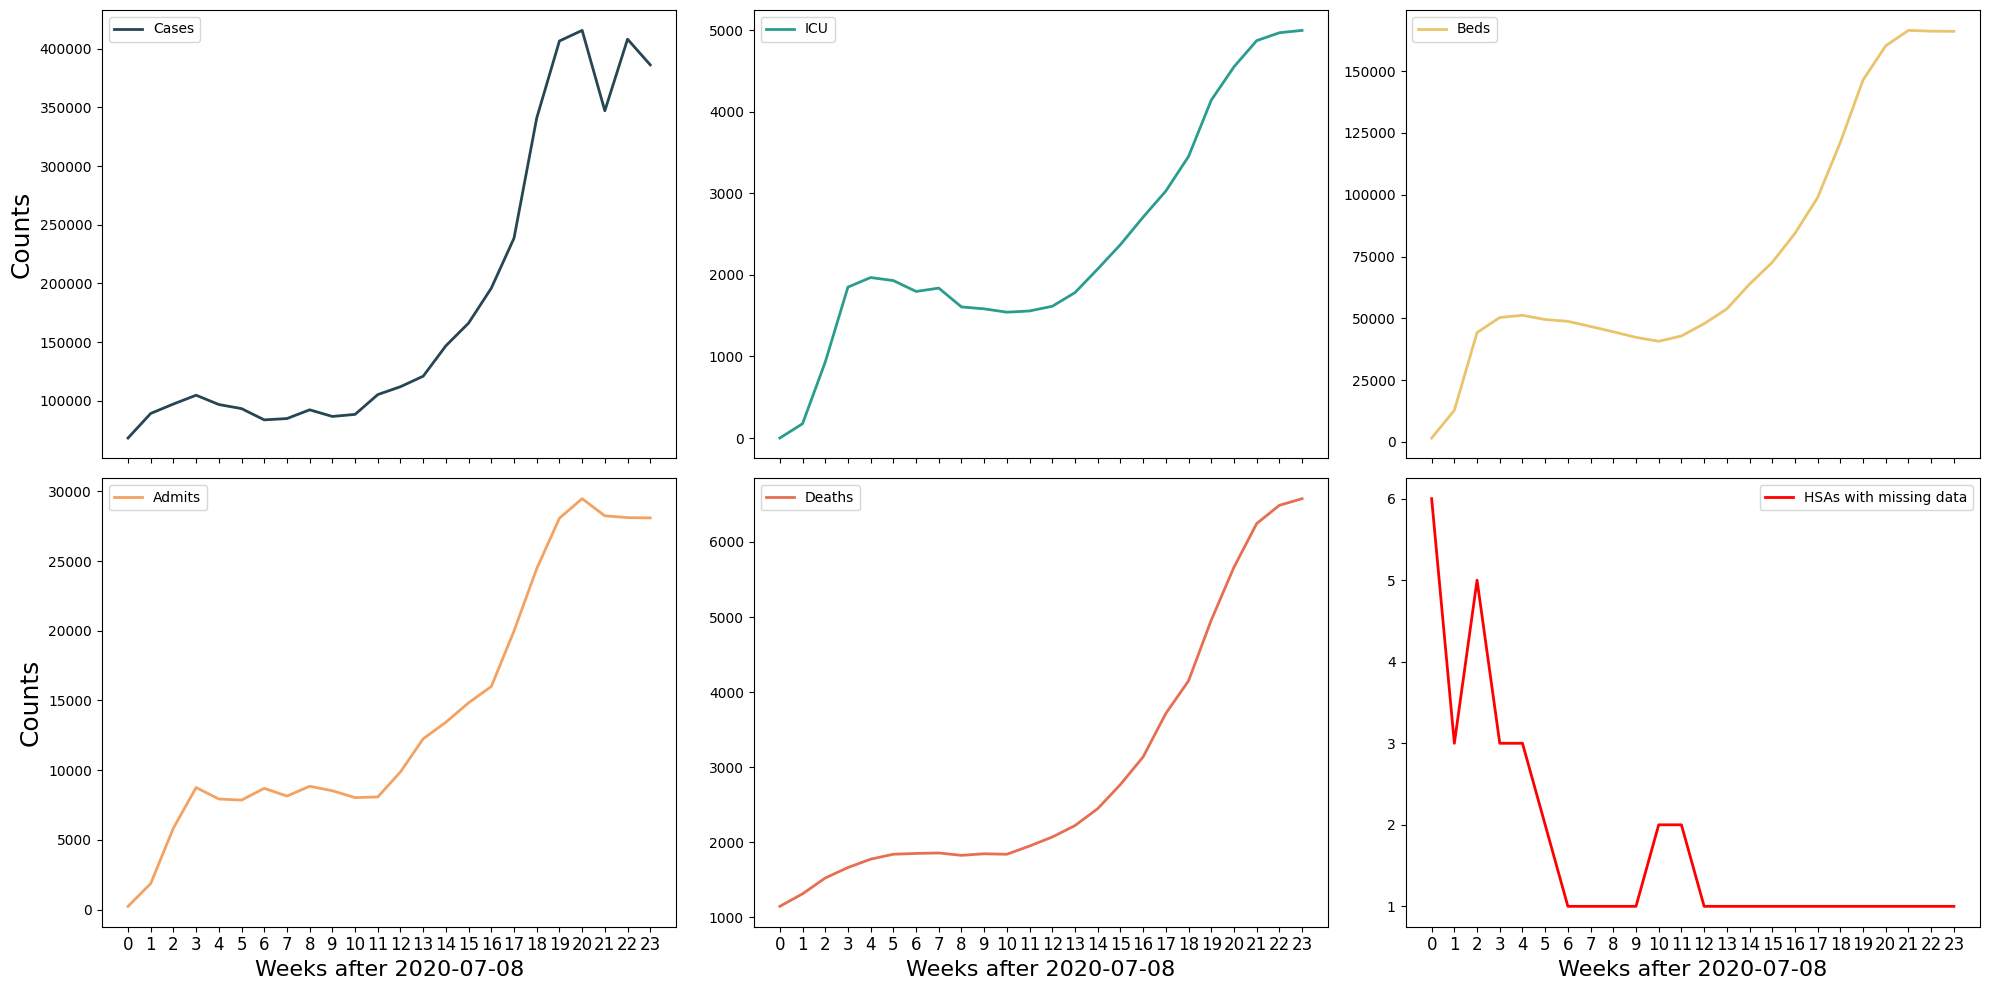

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')
axs = axs.ravel()

axs[0].tick_params(axis='both', which='both', labelsize=10)
axs[1].tick_params(axis='both', which='both', labelsize=10)
axs[2].tick_params(axis='both', which='both', labelsize=10)
axs[3].tick_params(axis='both', which='both', labelsize=10)
axs[4].tick_params(axis='both', which='both', labelsize=10)
axs[5].tick_params(axis='both', which='both', labelsize=10)

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0

axs[0].set_ylabel("Counts", fontsize = 18)
axs[3].set_ylabel("Counts", fontsize = 18)
axs[3].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[4].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
axs[5].set_xlabel("Weeks after 2020-07-08", fontsize = 16)
for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        missing_data_counts = weekly_groups.apply(lambda x: x['beds_weekly'].isnull().sum())
        axs[i].plot(weekly_groups['date'].first(), missing_data_counts,
                    label='HSAs with missing data', color=colours[i], linewidth=2)
    else:
        axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(),
                    label=labels[i], color=colours[i], linewidth=2)

    axs[i].legend()

    axs[i].set_xticks(range(len(data_by_HSA['date'].unique())))
    axs[i].set_xticklabels(labels=range(len(data_by_HSA['date'].unique())), rotation=0, fontsize=12)

    i += 1
plt.tight_layout()

plt.savefig('Graphs/Time_trends_July_December.png', dpi = 300)

In [5]:
len(data_by_HSA['health_service_area'].unique())

804

In [6]:
804*0.97

779.88